<a href="https://colab.research.google.com/github/khushijashnani/CEEL-82B---Data-Science/blob/master/DS_Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science - Tutorial 3**

*Topic - Classification after Reduction*

Name - Khushi Jashnani

UID - 2018130017

A Batch (Roll no - 10)

### **Problem 1 :**

Consider an equal mixture of three 3-dimensional Gaussian distributions with identical covariance matrices. After spher-ing the data, the covariance matrices are all equal to the identity matrix. Suppose the mean vectors of the sphered data are μ<sub>1</sub> = [2, 1, −3]<sup>T</sup>, μ<sub>2</sub> = [1, −4, 0]<sup>T</sup>, and μ<sub>3</sub>= [2, 4, 6]<sup>T</sup>

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

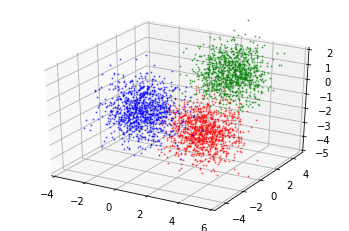

In [2]:
n = 1000

mu1 = np.array([2, 1, -3])

mu2 = np.array([1, -4, 0])

mu3 = np.array([2, 4, 0])

X1 = randn(n ,3) + mu1

X2 = randn(n ,3) + mu2

X3 = randn(n ,3) + mu3

fig = plt.figure()

ax = fig.gca(projection ='3d')

ax.plot(X1[:, 0] , X1[: ,1] , X1[: ,2] , 'r.', alpha =0.5 , markersize =2)

ax.plot(X2[:, 0] , X2[: ,1] , X2[: ,2] , 'b.', alpha =0.5 , markersize =2)

ax.plot(X3[:, 0] , X3[:, 1] , X3[:, 2] , 'g.', alpha =0.5 , markersize =2)

ax.set_xlim3d(-4 ,6)

ax.set_ylim3d(-5 ,5)

ax.set_zlim3d(-5 ,2)

plt.show()

In [3]:
!pip install pandas_datareader

In [4]:
from pandas_datareader import *

from numpy.linalg import svd , pinv

Since we have equal mixtures, we classify each data point x according to the closest distance to μ<sub>1</sub> , μ<sub>2</sub>, or μ<sub>3</sub> . We can achieve a reduction in the dimensionality of the data by projecting the data onto the two-dimensional affine space spanned by the { μ<sub>i</sub> }; that is, all

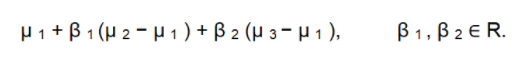

In fact, one may just as well project the data onto the subspace spanned by the vectors μ<sub>21</sub> = μ<sub>2</sub> − μ<sub>1</sub> and μ<sub>31</sub> = μ<sub>3</sub> − μ<sub>1</sub> . Let W = [ μ<sub>21</sub>, μ<sub>31</sub> ] be the 3 × 2 matrix whose columns are μ<sub>21</sub> and μ<sub>31</sub>. The orthogonal projection matrix onto the subspace W spanned by the columns of W<sub>i</sub>

image.png

In [5]:
mu21 = (mu2 - mu1).reshape(3, 1)
print("\nmu21 :\n", mu21)
mu31 = (mu3 - mu1).reshape(3, 1)
print("\nmu31 :\n", mu31)
W = np.hstack(( mu21, mu31))
print("\nW :\n", W)


mu21 :
 [[-1]
 [-5]
 [ 3]]

mu31 :
 [[0]
 [3]
 [3]]

W :
 [[-1  0]
 [-5  3]
 [ 3  3]]


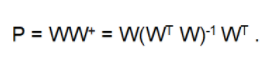

In [6]:
P = W @ pinv(W)
print("\nP :\n", P)


P :
 [[ 0.03030303  0.12121212 -0.12121212]
 [ 0.12121212  0.98484848  0.01515152]
 [-0.12121212  0.01515152  0.98484848]]


Let UDV<sup>T</sup> be the singular value decomposition of W. 

In [7]:
U,_,_ = svd(W) # we only need U
print("\nU :\n", U)


U :
 [[-0.15689893  0.07540395  0.98473193]
 [-0.93388802 -0.33571067 -0.12309149]
 [ 0.32130344 -0.93894227  0.12309149]]


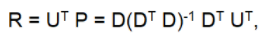

In [8]:
R = U.T @ P
print("\nR :\n", R)


R :
 [[-1.56898932e-01 -9.33888017e-01  3.21303435e-01]
 [ 7.54039495e-02 -3.35710675e-01 -9.38942270e-01]
 [-2.01285025e-17  3.47673624e-17  1.98263319e-16]]


Applying R to all the data points, and ignoring the 3rd component of the projected points (which is 0),We see that the projected points are much better separated than the original ones. We have achieved dimensionality reduction of the data while retaining all the necessary information required for classification.

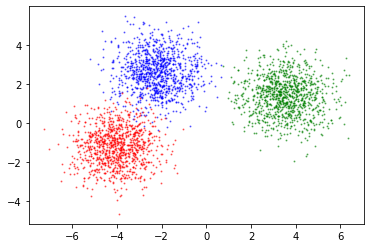

In [9]:
RX1 = (R @ X1.T).T

RX2 = (R @ X2.T).T

RX3 = (R @ X3.T).T

plt.plot(RX1[:, 0], RX1[:, 1] , 'b.', alpha =0.5 , markersize =2)

plt.plot(RX2[:, 0], RX2[:, 1] , 'g.', alpha =0.5 , markersize =2)

plt.plot(RX3 [: ,0] , RX3 [: ,1] ,'r.',alpha =0.5 , markersize =2)

plt.show()

**Conclusion -**

- Through this tutorial, I understood how to implement dimentionality reduction while preserving the important features.
- I performed dimentionality reduction using SVD and understood the details by implementing it.
- The important retained features in the lower dimension can further be used in classification problems thus reducing the computation by saving time and space.